# I. General process

## 1.Read file

In [204]:
'''
hue_test = 'https://raw.githubusercontent.com/Nguyen-Van-Truong-Khoa/PTTK_FINAL_PROJECT/main/rainfall_hue_2020_2022.csv'
import pandas as pd
dataset1 = pd.read_csv(hue_test, index_col = "date", parse_dates= True).asfreq("D")
dataset1

dataset2 = pd.read_csv(hue_test, index_col = "date", parse_dates= True).asfreq("D")
dataset2
'''

'\nhue_test = \'https://raw.githubusercontent.com/Nguyen-Van-Truong-Khoa/Group-12---ProjectCS4273.N12.1/main/hue_test.csv\'\nimport pandas as pd\ndataset1 = pd.read_csv(hue_test, index_col = "date", parse_dates= True).asfreq("D")\ndataset1\n\ndataset2 = pd.read_csv(hue_test, index_col = "date", parse_dates= True).asfreq("D")\ndataset2\n'

In [1]:
import pandas as pd

dataset1 = pd.read_csv("../Dataset/rainfall_hue_2020_2022.csv", index_col = "date", parse_dates= True).asfreq("D")
dataset1

dataset2 = pd.read_csv("../Dataset/rainfall_hue_2020_2022.csv", index_col = "date", parse_dates= True).asfreq("D")
dataset2

,rain,Unnamed: 2
date,,
2020-01-01,19.0,NaN
2020-01-02,26.9,NaN
2020-01-03,3.5,NaN
2020-01-04,0.7,NaN
2020-01-05,0.2,NaN
...,...,...
2022-12-25,0.0,NaN
2022-12-26,0.0,NaN
2022-12-27,2.2,NaN


## 2. Choose needed column

In [3]:
# Take needed column
df1 = dataset1[['rain']]
df1

df2  = dataset2[['rain']]
df2

,rain
date,
2020-01-01,19.0
2020-01-02,26.9
2020-01-03,3.5
2020-01-04,0.7
2020-01-05,0.2
...,...
2022-12-25,0.0
2022-12-26,0.0
2022-12-27,2.2


In [4]:
#Check Nan value
import numpy as np
print(df2[np.isnan(df2["rain"])].index)

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq='D')


## 3. Split data

In [5]:
ratio_train = 0.7
train = df2[:int(len(df2)*ratio_train)]
test = df2[int(len(df2)*ratio_train):]
print(train)
print(test)
train1 = df2[:int(len(df2)*ratio_train)]
test1 = df2[int(len(df2)*ratio_train):]
print(train1)
print(test1)

            rain
date            
2020-01-01  19.0
2020-01-02  26.9
2020-01-03   3.5
2020-01-04   0.7
2020-01-05   0.2
...          ...
2022-01-30   0.0
2022-01-31   1.0
2022-02-01   0.0
2022-02-02   0.7
2022-02-03   1.2

[765 rows x 1 columns]
            rain
date            
2022-02-04   4.0
2022-02-05  11.4
2022-02-06   2.0
2022-02-07   0.0
2022-02-08   0.0
...          ...
2022-12-25   0.0
2022-12-26   0.0
2022-12-27   2.2
2022-12-28   5.0
2022-12-29  26.1

[329 rows x 1 columns]
            rain
date            
2020-01-01  19.0
2020-01-02  26.9
2020-01-03   3.5
2020-01-04   0.7
2020-01-05   0.2
...          ...
2022-01-30   0.0
2022-01-31   1.0
2022-02-01   0.0
2022-02-02   0.7
2022-02-03   1.2

[765 rows x 1 columns]
            rain
date            
2022-02-04   4.0
2022-02-05  11.4
2022-02-06   2.0
2022-02-07   0.0
2022-02-08   0.0
...          ...
2022-12-25   0.0
2022-12-26   0.0
2022-12-27   2.2
2022-12-28   5.0
2022-12-29  26.1

[329 rows x 1 columns]


## 4. Visualizing dataset

<function matplotlib.pyplot.show(close=None, block=None)>

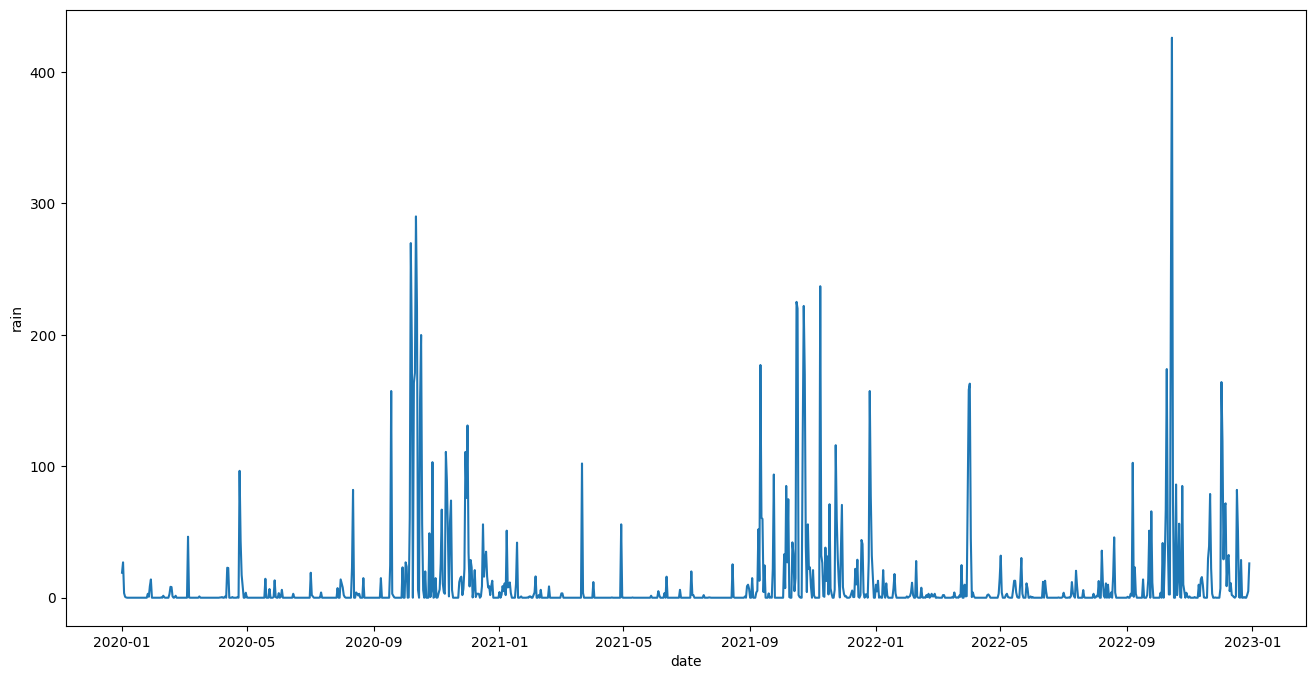

In [209]:
#import lib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
# labeling
plt.xlabel('date')
plt.ylabel('rain')

# plotting
plt.plot(df2)
plt.show

# II. LSTM

## 1. Import library

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

In [7]:
# take the rainfall value
train_processed = df2.iloc[:, 0:1].values

train_processed = train_processed[:int(len(df2)*ratio_train):1]

print(train_processed.shape)

test_processed = df2.iloc[:, 0:1].values

test_processed = test_processed[int(len(df2)*ratio_train)::1]
print(test_processed.shape)


(765, 1)
(329, 1)


# .

In [212]:
#Nomalize the data
min = 0
max = 1
scaler = MinMaxScaler(feature_range=(min, max))
train_sc = scaler.fit_transform(train_processed)
test_sc = scaler.transform(test_processed)
print(train_sc)
print(test_sc)

## .

In [213]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
print(X_train)
print(y_train)

[[6.55172414e-02]
 [9.27586207e-02]
 [1.20689655e-02]
 [2.41379310e-03]
 [6.89655172e-04]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.03448276e-02]
 [2.41379310e-03]
 [3.03448276e-02]
 [4.79310345e-02]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [6.89655172e-04]
 [0.00000000e+00]
 [5.17241379e-03]
 [6.89655172e-04]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [9.31034483e-03]
 [2.86206897e-02]
 [2.79310345e-02]
 [3.44827586e-03]
 [0.00000000e+00]
 [6.89655172e-04]
 [5.17241379e-03]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.000000

In [214]:
X_test = test_sc[:-1]
y_test = test_sc[1:]

## 2. LSTM model

In [215]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)
print(train_sc_df)

                   Y
date                
2020-01-01  0.065517
2020-01-02  0.092759
2020-01-03  0.012069
2020-01-04  0.002414
2020-01-05  0.000690
...              ...
2022-01-30  0.000000
2022-01-31  0.003448
2022-02-01  0.000000
2022-02-02  0.002414
2022-02-03  0.004138

[765 rows x 1 columns]


In [216]:
#create new input column by taking value of previous day
for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)
print(train_sc_df)
#remove first day
X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)
print(y_train)
X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)
X_train = X_train['X_1']
y_train = y_train['Y']
X_test = X_test['X_1']
y_test = y_test['Y']
#Create X and Y column
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

                   Y       X_1
date                          
2020-01-01  0.065517       NaN
2020-01-02  0.092759  0.065517
2020-01-03  0.012069  0.092759
2020-01-04  0.002414  0.012069
2020-01-05  0.000690  0.002414
...              ...       ...
2022-01-30  0.000000  0.000000
2022-01-31  0.003448  0.000000
2022-02-01  0.000000  0.003448
2022-02-02  0.002414  0.000000
2022-02-03  0.004138  0.002414

[765 rows x 2 columns]
                   Y
date                
2020-01-02  0.092759
2020-01-03  0.012069
2020-01-04  0.002414
2020-01-05  0.000690
2020-01-06  0.000000
...              ...
2022-01-30  0.000000
2022-01-31  0.003448
2022-02-01  0.000000
2022-02-02  0.002414
2022-02-03  0.004138

[764 rows x 1 columns]


In [217]:
#reshape to 3D array
X_train_lmse = X_train.reshape(X_train.shape[0], 1, 1)
X_test_lmse = X_test.reshape(X_test.shape[0], 1, 1)

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (764, 1, 1)
Test shape:  (328, 1, 1)


In [218]:
#train model
lstm_model = Sequential()
lstm_model.add(LSTM(365, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
764/764 [==============================] - 6s 7ms/step - loss: 0.0109
Epoch 2/100
764/764 [==============================] - 6s 7ms/step - loss: 0.0105
Epoch 3/100
764/764 [==============================] - 6s 7ms/step - loss: 0.0105
Epoch 4/100
764/764 [==============================] - 6s 7ms/step - loss: 0.0105
Epoch 5/100
764/764 [==============================] - 6s 8ms/step - loss: 0.0104
Epoch 6/100
764/764 [==============================] - 6s 7ms/step - loss: 0.0104
Epoch 7/100
764/764 [==============================] - 5s 7ms/step - loss: 0.0104
Epoch 8/100
764/764 [==============================] - 6s 7ms/step - loss: 0.0104
Epoch 9/100
764/764 [==============================] - 6s 7ms/step - loss: 0.0103
Epoch 10/100
764/764 [==============================] - 6s 8ms/step - loss: 0.0103
Epoch 11/100
764/764 [==============================] - 6s 8ms/step - loss: 0.0103
Epoch 12/100
764/764 [==============================] - 5s 7ms/step - loss: 0.0103
Epoch 13/100


In [219]:
#Predict test
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
#print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
#print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

24/24 [==============================] - 0s 3ms/step


In [220]:
#nn_y_pred_test = nn_model.predict(X_test)
lstm_y_pred_test = lstm_model.predict(X_test_lmse)

11/11 [==============================] - 0s 2ms/step


In [221]:
#Inverst scale
inverse1 = scaler.inverse_transform(lstm_y_pred_test)
inverse1

array([[ 10.25737  ],
       [ 13.358379 ],
       [  9.426354 ],
       [  8.598309 ],
       [  8.598309 ],
       [ 20.39512  ],
       [  8.887789 ],
       [  8.598309 ],
       [  8.598309 ],
       [  8.598309 ],
       [ 11.760766 ],
       [  8.680981 ],
       [  8.598309 ],
       [  8.680981 ],
       [  8.598309 ],
       [  9.426354 ],
       [  8.805043 ],
       [  9.841489 ],
       [  8.598309 ],
       [  8.887789 ],
       [  9.841489 ],
       [  9.011962 ],
       [  9.011962 ],
       [  9.841489 ],
       [  8.598309 ],
       [  8.598309 ],
       [  8.680981 ],
       [  8.598309 ],
       [  8.598309 ],
       [  8.598309 ],
       [  8.598309 ],
       [  9.426354 ],
       [  9.426354 ],
       [  8.598309 ],
       [  8.598309 ],
       [  8.598309 ],
       [  8.598309 ],
       [  8.598309 ],
       [  8.598309 ],
       [  8.598309 ],
       [  8.805043 ],
       [  8.598309 ],
       [ 10.25737  ],
       [  8.805043 ],
       [  8.598309 ],
       [  

In [222]:
#Replace index days
index = test.index[1:]
print(index)
inverse1 = inverse1.reshape(-1)
print(inverse1)
print(len(inverse1))
pre = pd.DataFrame(inverse1,index = index, columns=['rain'])
print(len(pre))
#pre.index = test.index
pre

DatetimeIndex(['2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08',
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12',
               '2022-02-13', '2022-02-14',
               ...
               '2022-12-20', '2022-12-21', '2022-12-22', '2022-12-23',
               '2022-12-24', '2022-12-25', '2022-12-26', '2022-12-27',
               '2022-12-28', '2022-12-29'],
              dtype='datetime64[ns]', name='date', length=328, freq='D')
[ 10.25737    13.358379    9.426354    8.598309    8.598309   20.39512
   8.887789    8.598309    8.598309    8.598309   11.760766    8.680981
   8.598309    8.680981    8.598309    9.426354    8.805043    9.841489
   8.598309    8.887789    9.841489    9.011962    9.011962    9.841489
   8.598309    8.598309    8.680981    8.598309    8.598309    8.598309
   8.598309    9.426354    9.426354    8.598309    8.598309    8.598309
   8.598309    8.598309    8.598309    8.598309    8.805043    8.598309
  10.25737     8.805043    8.59830

,rain
date,
2022-02-05,10.257370
2022-02-06,13.358379
2022-02-07,9.426354
2022-02-08,8.598309
2022-02-09,8.598309
...,...
2022-12-25,8.805043
2022-12-26,8.598309
2022-12-27,8.598309


# .

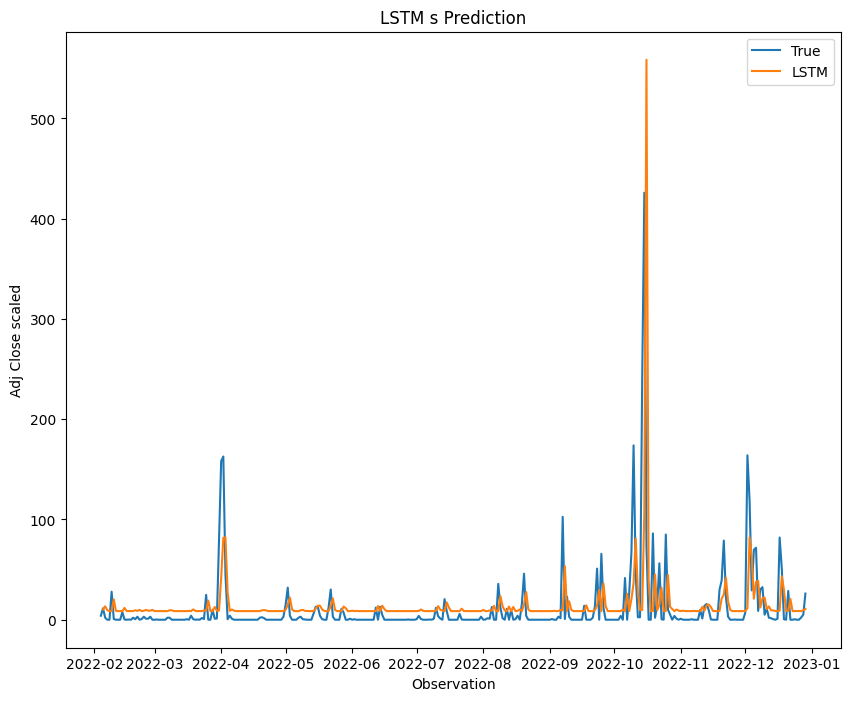

In [223]:
plt.figure(figsize=(10, 8))
plt.plot(test, label='True')
plt.plot(pre, label='LSTM')
plt.title('LSTM s Prediction')
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show()

# .

### Scale plot

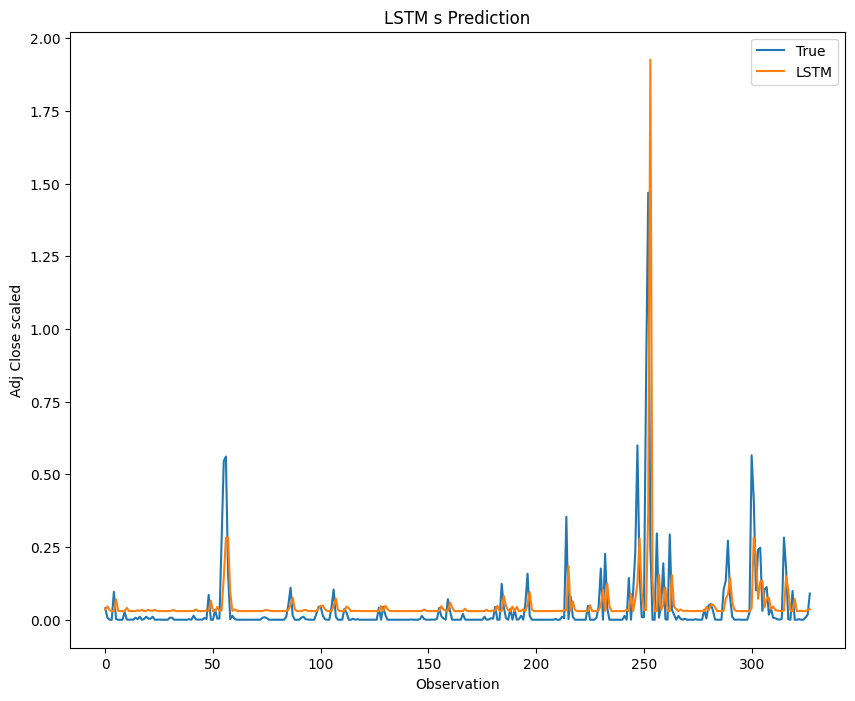

In [224]:
plt.figure(figsize=(10, 8))
plt.plot(y_test, label='True')
plt.plot(lstm_y_pred_test, label='LSTM')
plt.title('LSTM s Prediction')
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show()

In [225]:
print(len(y_test))
print(len(lstm_y_pred_test))

328
328


# 3. Result evaluation

In [226]:
actual = y_test[:len(y_test) -1]
predict =lstm_y_pred_test[1:]

In [227]:
#MAE
MAE = 0
for i in range(len(actual)):
    MAE = MAE + abs(actual[i] - predict[i])
MAE = MAE / len(actual)
print(MAE)

[0.03672896]


In [228]:
#RMSE
RMSE = 0
for i in range(len(actual)):
    RMSE = RMSE + (actual[i] - predict[i])**2
RMSE = np.sqrt(RMSE / len(actual))
print(RMSE)

[0.06082606]


##  4. predicted value from 1/1/2023 to 30/1/2023

### Input last 1 day to predict

In [229]:
# scale data
data_scaled = df1.iloc[:, 0:1].values
data_scaled = data_scaled[::1]
data_scaled = scaler.fit_transform(data_scaled)

In [230]:
number_day_input = 1

In [231]:
#create input data
x_input=data_scaled[-number_day_input:]
print(x_input)
#reshape input data
x_input = x_input.reshape(1, -1)
print(x_input)
#create temperture input
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

[[0.06128199]]
[[0.06128199]]


In [232]:
#predict next 32 day
from numpy import array

lst_output1=[]
n_steps=number_day_input
i=0
while(i<32):
    
    if(len(temp_input)>number_day_input):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = lstm_model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output1.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = lstm_model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        lst_output1.extend(yhat.tolist())
        i=i+1
    
print(lst_output1)

[0.05538741]
1 day input [0.05538741]
1 day output [[0.05287518]]
2 day input [0.05287518]
2 day output [[0.0518069]]
3 day input [0.0518069]
3 day output [[0.05135307]]
4 day input [0.05135307]
4 day output [[0.05116034]]
5 day input [0.05116034]
5 day output [[0.05107851]]
6 day input [0.05107851]
6 day output [[0.05104377]]
7 day input [0.05104377]
7 day output [[0.05102903]]
8 day input [0.05102903]
8 day output [[0.05102277]]
9 day input [0.05102277]
9 day output [[0.05102011]]
10 day input [0.05102011]
10 day output [[0.05101898]]
11 day input [0.05101898]
11 day output [[0.0510185]]
12 day input [0.0510185]
12 day output [[0.05101829]]
13 day input [0.05101829]
13 day output [[0.05101821]]
14 day input [0.05101821]
14 day output [[0.05101817]]
15 day input [0.05101817]
15 day output [[0.05101816]]
16 day input [0.05101816]
16 day output [[0.05101815]]
17 day input [0.05101815]
17 day output [[0.05101815]]
18 day input [0.05101815]
18 day output [[0.05101815]]
19 day input [0.051

In [233]:
inverse2 = scaler.inverse_transform(lst_output1)
inverse2
#inverse2 = inverse2.reshape(-1)
print(inverse2[:30])
print(len(inverse2))

[[23.58950005]
 [22.51954066]
 [22.06455899]
 [21.8712713 ]
 [21.78919008]
 [21.7543388 ]
 [21.73954374]
 [21.73326239]
 [21.7305969 ]
 [21.72946407]
 [21.72898491]
 [21.72877866]
 [21.72869139]
 [21.7286549 ]
 [21.72863903]
 [21.72863269]
 [21.7286311 ]
 [21.7286311 ]
 [21.7286311 ]
 [21.7286311 ]
 [21.7286311 ]
 [21.7286311 ]
 [21.7286311 ]
 [21.7286311 ]
 [21.7286311 ]
 [21.7286311 ]
 [21.7286311 ]
 [21.7286311 ]
 [21.7286311 ]
 [21.7286311 ]]
32


#### .

In [234]:
'''import numpy as np
from datetime import date
d1 = date(df1.index[len(df1)-1].year,df1.index[len(df1)-1].month,df1.index[len(df1)-1].day)
d0 = date(2023,1,30)
delta = abs(d0 - d1).days +1
print(delta)
array = np.array([[[y_train[len(y_train)-1]]]],float)
for i in range(delta):
    print(array)
    predict = lstm_model.predict(array)
    print(predict[-1])
    array = np.concatenate((array, [[predict[-1]]]),axis=0)
array2 = array[-30:-1]
array2 = array2.reshape(-1,1)
scaler.inverse_transform(array2)'''

'import numpy as np\nfrom datetime import date\nd1 = date(df1.index[len(df1)-1].year,df1.index[len(df1)-1].month,df1.index[len(df1)-1].day)\nd0 = date(2023,1,30)\ndelta = abs(d0 - d1).days +1\nprint(delta)\narray = np.array([[[y_train[len(y_train)-1]]]],float)\nfor i in range(delta):\n    print(array)\n    predict = lstm_model.predict(array)\n    print(predict[-1])\n    array = np.concatenate((array, [[predict[-1]]]),axis=0)\narray2 = array[-30:-1]\narray2 = array2.reshape(-1,1)\nscaler.inverse_transform(array2)'

## Input last 100 day to predict

In [235]:
#read data again
dataset3 = pd.read_csv("../Dataset/rainfall_hue_2020_2022.csv", index_col = "date", parse_dates= True).asfreq("D")
dataset3 = dataset3.rain
dataset3

date
2020-01-01    19.0
2020-01-02    26.9
2020-01-03     3.5
2020-01-04     0.7
2020-01-05     0.2
              ... 
2022-12-25     0.0
2022-12-26     0.0
2022-12-27     2.2
2022-12-28     5.0
2022-12-29    26.1
Freq: D, Name: rain, Length: 1094, dtype: float64

In [236]:
# take needed value
df = dataset3.values
df=df.reshape(-1,1)

#scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

In [237]:
input_number = 100

steps= input_number
inp = []
out = []
for i in range(len(data_scaled) - (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])
    
inp= np.asanyarray(inp)
out= np.asanyarray(out)

ratio_train = 0.7

#crate train and test data
x_train = inp[:int(len(df)*ratio_train),:,:]
x_test = inp[int(len(df)*ratio_train):,:,:]    
y_train = out[:int(len(df)*ratio_train)]    
y_test= out[int(len(df)*ratio_train):]

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

# train data with 100 day input
model = Sequential()
model.add(LSTM(365, return_sequences= True, input_shape= (input_number,1)))
model.add(LSTM(365, return_sequences=True))
model.add(LSTM(365))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model = Sequential()
model.add(LSTM(365, return_sequences= True, input_shape= (input_number,1)))
model.add(LSTM(365, return_sequences=True))
model.add(LSTM(365))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.fit(x_train,y_train,epochs=300, verbose=1, )

Epoch 1/300
24/24 [==============================] - 42s 2s/step - loss: 0.0062
Epoch 2/300
24/24 [==============================] - 38s 2s/step - loss: 0.0060
Epoch 3/300
24/24 [==============================] - 39s 2s/step - loss: 0.0059
Epoch 4/300
24/24 [==============================] - 39s 2s/step - loss: 0.0058
Epoch 5/300
24/24 [==============================] - 40s 2s/step - loss: 0.0056
Epoch 6/300
24/24 [==============================] - 41s 2s/step - loss: 0.0054
Epoch 7/300
24/24 [==============================] - 40s 2s/step - loss: 0.0053
Epoch 8/300
24/24 [==============================] - 41s 2s/step - loss: 0.0048
Epoch 9/300
24/24 [==============================] - 43s 2s/step - loss: 0.0049
Epoch 10/300
24/24 [==============================] - 43s 2s/step - loss: 0.0048
Epoch 11/300
24/24 [==============================] - 44s 2s/step - loss: 0.0050
Epoch 12/300
24/24 [==============================] - 43s 2s/step - loss: 0.0048
Epoch 13/300
24/24 [=================

8/8 [==============================] - 4s 426ms/step


Text(0.5, 1.0, 'Predictions VS True Values on Testing Set')

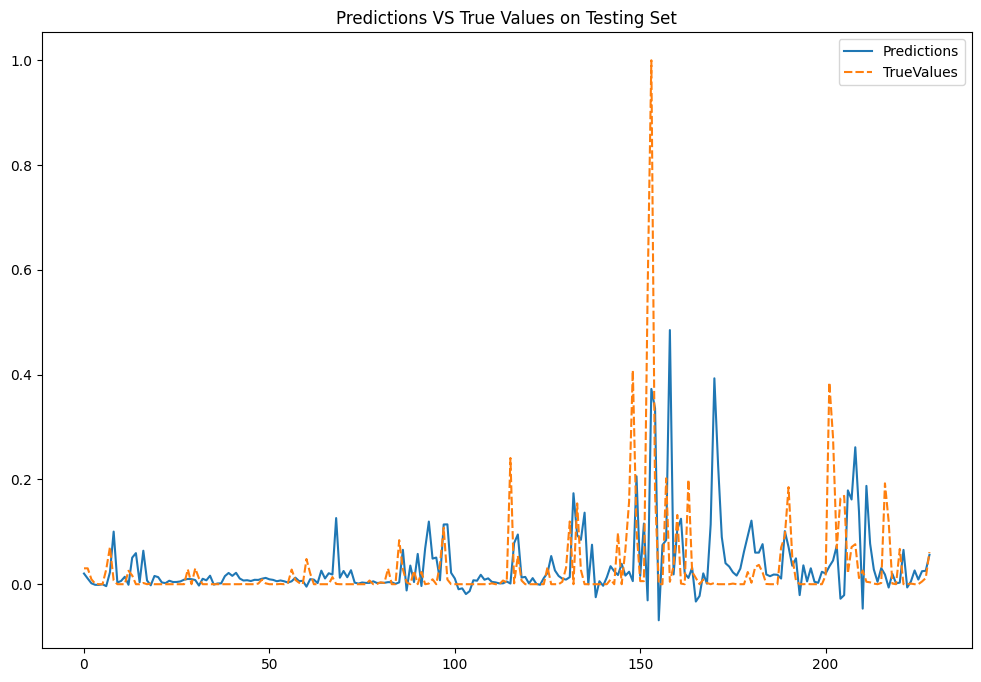

In [239]:
# predict test and valuate
predictions=model.predict(x_test)

pred_df=pd.DataFrame(predictions)

pred_df['TrueValues']=y_test

pred_df_new = pred_df.rename(columns={ 0: 'Predictions'})

plt.figure(figsize=(12,8))
sns.lineplot(data= pred_df_new)
plt.title("Predictions VS True Values on Testing Set")

In [244]:
x_input=data_scaled[:input_number]

x_input = x_input.reshape(1, -1)

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output2=[]
n_steps=input_number
i=0
while(i<32):
    
    if(len(temp_input)>input_number):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output2.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        lst_output2.extend(yhat.tolist())
        i=i+1
    

print(scaler.inverse_transform(lst_output2))

[0.0090809]
1 day input [0.06316037 0.00821789 0.00164358 0.00046959 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00704391 0.00164358 0.02066213 0.03263677 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00046959 0.         0.00352195 0.00046959 0.
 0.         0.         0.         0.00633952 0.01948814 0.01901855
 0.00234797 0.         0.00046959 0.00352195 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.10894576 0.00046959 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00234797 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00046959 0.00046959
 0.00117398 0.  

In [245]:
df4 = scaler.inverse_transform(lst_output2)
df4

array([[ 3.86755685],
       [ 7.67565185],
       [ 8.23361266],
       [ 5.5218051 ],
       [ 2.56468204],
       [ 1.03207135],
       [ 2.10692063],
       [ 3.53152583],
       [ 2.41882738],
       [ 2.05378536],
       [ 4.74510673],
       [ 9.41597322],
       [ 9.73880054],
       [ 6.27443474],
       [ 0.28364462],
       [-2.38337795],
       [ 0.85547153],
       [ 4.48820507],
       [ 4.0078822 ],
       [ 3.09224119],
       [ 8.38217644],
       [17.2624901 ],
       [11.47367272],
       [ 5.64286436],
       [-1.53360231],
       [-4.47691719],
       [ 0.64547059],
       [ 5.72444897],
       [ 4.46583002],
       [ 2.83987086],
       [ 9.64991597],
       [25.98040007]])

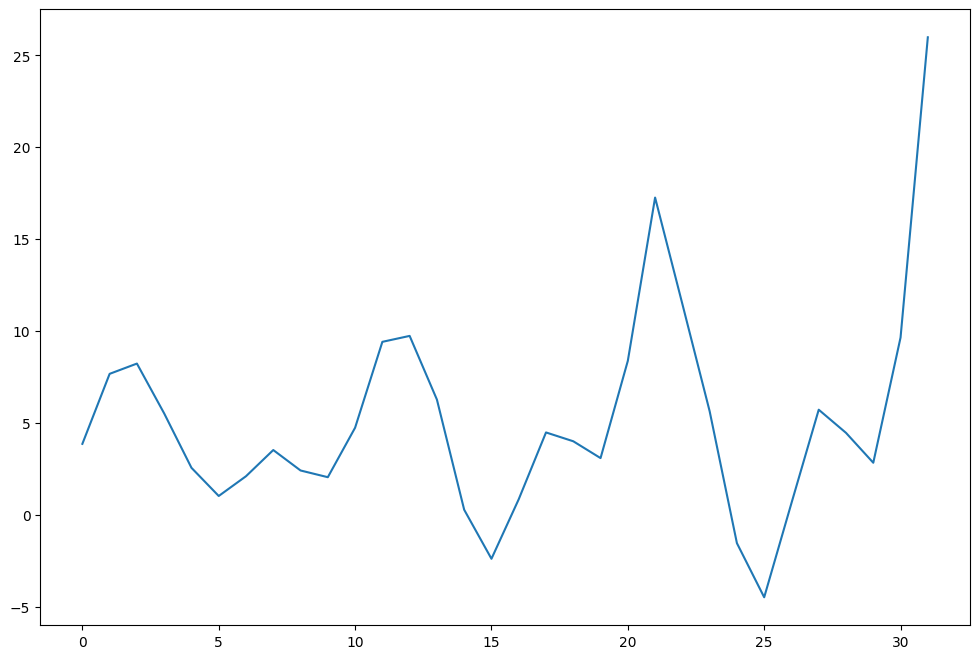

In [246]:
plt.figure(figsize=(12,8))
plt.plot(df4)